# ncov-19 Measures

**Data Source:** [Humanitarian Data Exchange - HDX](https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases)

**Introduction:** A look at what measures are being taken across the globe and when. Tracking the progression over time.

**Methodology:** Descriptive and exploratory analysis 

### Summary




**Loading the dataset**

In [22]:
## libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic

import warnings
warnings.filterwarnings('ignore')

In [23]:
## plot settings
params = {
    'font.size' : 10.0,
    'figure.figsize': (15.0, 8.0),
}
plt.rcParams.update(params)
plt.style.use('fivethirtyeight') #tableau-colorblind10 ggplot

In [24]:
## Load dataset from HDX
xlfile  = pd.ExcelFile("https://data.humdata.org/dataset/e1a91ae0-292d-4434-bc75-bf863d4608ba/resource/8a98c9cd-2c49-41fb-9a8e-6c76821c4d72/download/20200317-acaps-covid-19_goverment-measures-dataset.xlsx")
dfs = { sht : xlfile.parse(sht) for sht in xlfile.sheet_names}

df = dfs["Database"]
print( df.shape ) 
df.head(2)

(815, 16)


,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Public health measures,Health screenings in airports and border cross...,No,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Public health measures,Introduction of quarantine policies,No,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN


In [109]:
## Preprocessing 

hyperz = ["CHN", "ITA", "IRN", "USA", "KEN", "PRK"] #DEU, PRK, MYS, ZAN
compz = ["ISR", "SGP", "IND", "KEN"]

## 1. Broader measure categories 
def setClassType( mstr):
    mstr = mstr.lower() 
    if "border" in mstr  or "checkpoints"  in mstr or "arrival" in mstr or "travel" in mstr or "flights" in mstr or "visa" in mstr:
        return "Border Movements Action"
    elif "econom" in mstr or "imports" in mstr:
        return "Economic Action"
    elif "citizen" in mstr  or "surveilance" in mstr  or "lockdown" in mstr  or "state of emergency" in mstr or "awareness" in mstr or "psychological" in mstr:
        return "Internal Movement & Individual Support"
#         return "Restrict Internal Movement"
#     elif  "awareness" in mstr or "psychological" in mstr:
#         return "Empower Individual Responsibility"
    elif "policies" in mstr or "structures" in mstr  or "system"  in mstr: 
        return "Setup Policies & Structures"       
    elif "closure" in mstr or "gatherings" in mstr :
        return "Service Closure" #"Systems Setup & Service Closure"
    else:
        return "Other"

# A. Add broader category
df[ 'MEASURE_TYPES'] = df.apply( lambda x: setClassType(x['MEASURE']), axis=1)

# b. Clean up cases
df.COUNTRY = df.COUNTRY.str.title()

In [96]:
## Helper functions

# a. bar plots
def horizontal_count_plot(title, var, hue=None, ddata=df, order=None, dodge=False):
    order = order if order is not None else ddata[var].value_counts().index 
    sns.countplot(y=var, hue=hue, data=ddata, dodge=dodge, ).set_title( title)
    
# b. helper @ facet grid bar plots 
def cplot(x, **kwargs):
    sns.countplot(y=x,  **kwargs, palette= sns.husl_palette(9, s=0.7 ))#.set_title( title )
    
# c. facetgrid
def facet_grid(title, var, col, ptype=cplot, ddata=df, order=None, **kwargs):
    order = order if order is not None else ddata[var].value_counts().index 
    g = sns.FacetGrid(col=col, col_wrap=3, size=4, aspect=1.25, data=ddata)
    fg = g.map( ptype, var, order=order)

# d.
def swarm_grouped(title, var_x, var_y, ls_grpby, ddata=df):
    dtmp = ddata.groupby( ls_grpby).size().reset_index()
    sns.swarmplot(x=var_x, y=var_y, data=ddata).set_title( title ) 
    
# e. show in grid
def show_in_grid(ncolz, sharex=True):
    fig, ax = plt.subplots( ncols=ncolz, figsize=(20.0, 9.0), sharex=sharex)
    
    fig.tight_layout()
    


### 1. What Measures are being taken?

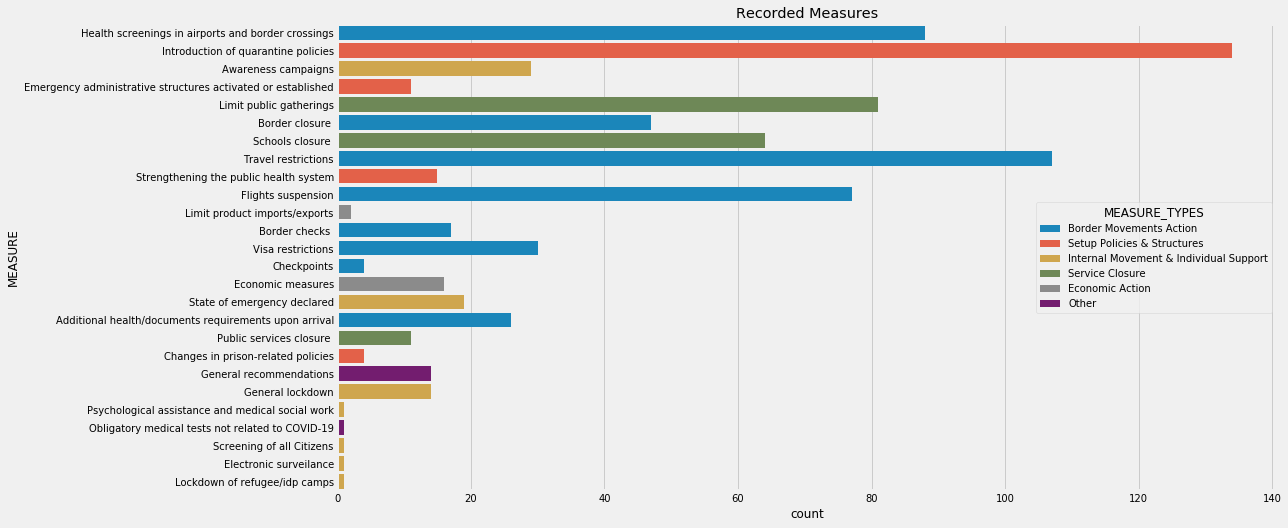

In [51]:
horizontal_count_plot('Recorded Measures', 'MEASURE', 'MEASURE_TYPES')

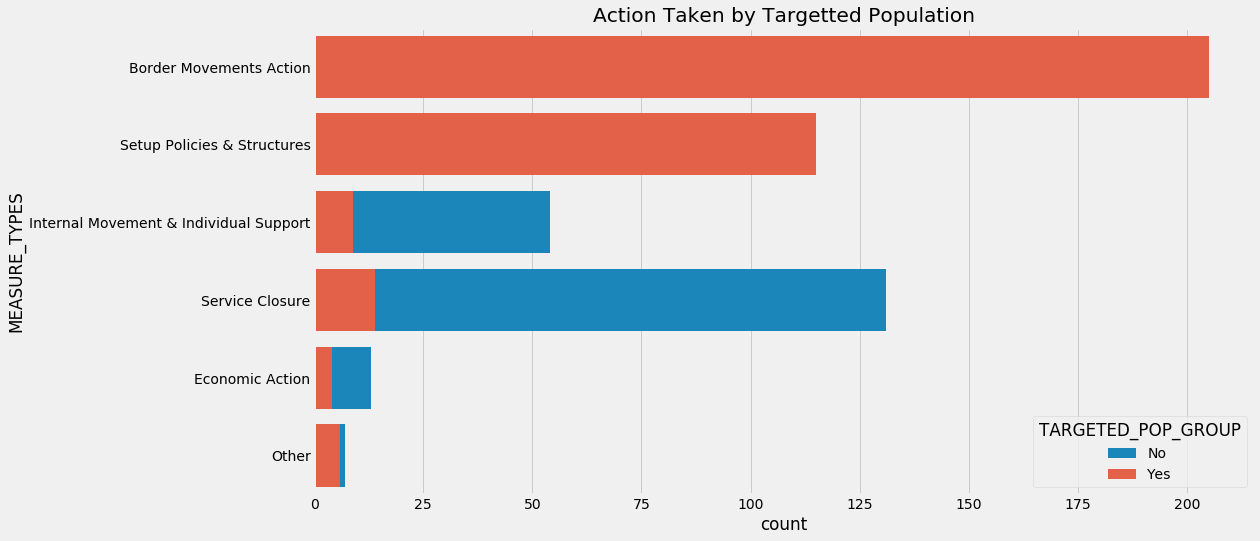

In [46]:
horizontal_count_plot("Action Taken by Targetted Population", "MEASURE_TYPES", "TARGETED_POP_GROUP", order=df.MEASURE_TYPES.value_counts().index)

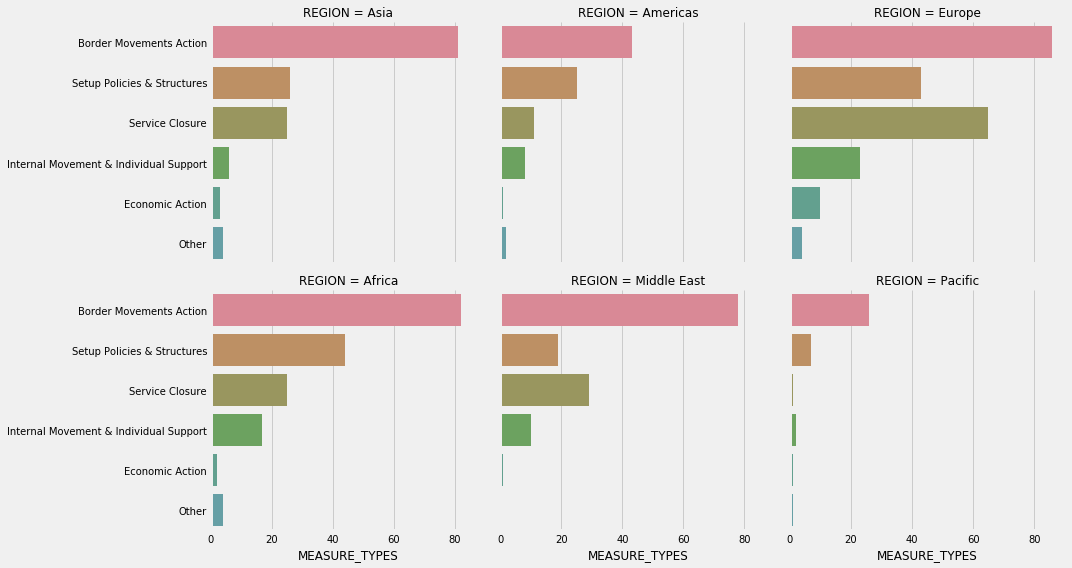

In [79]:
facet_grid( "Measures by Region", 'MEASURE_TYPES', 'REGION')

### 2. When are the measures being initiated?

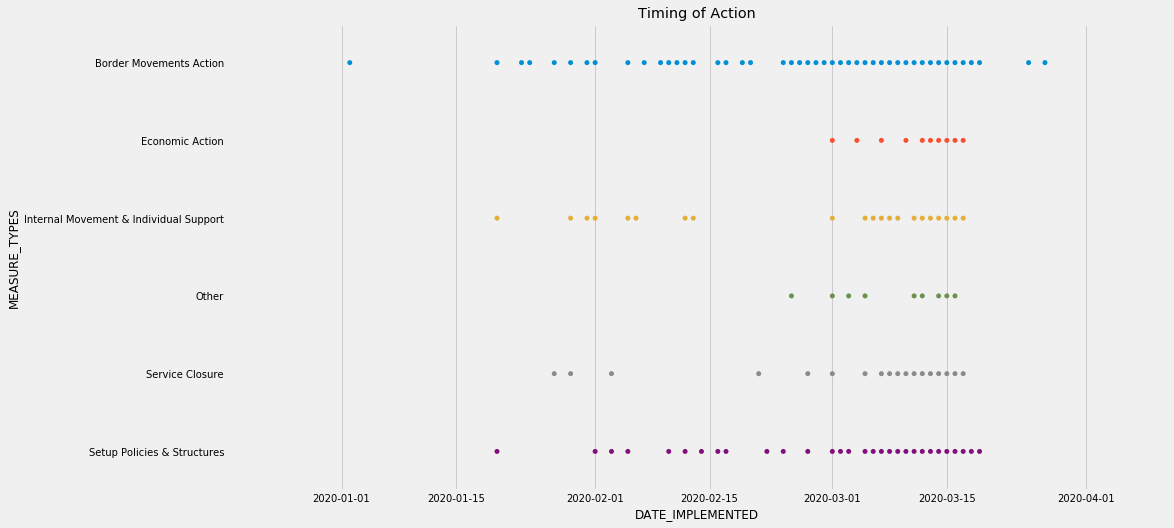

In [88]:
swarm_grouped( 'Timing of Action by Measure Type', 'DATE_IMPLEMENTED', 'MEASURE_TYPES', ['MEASURE_TYPES', 'DATE_IMPLEMENTED'])

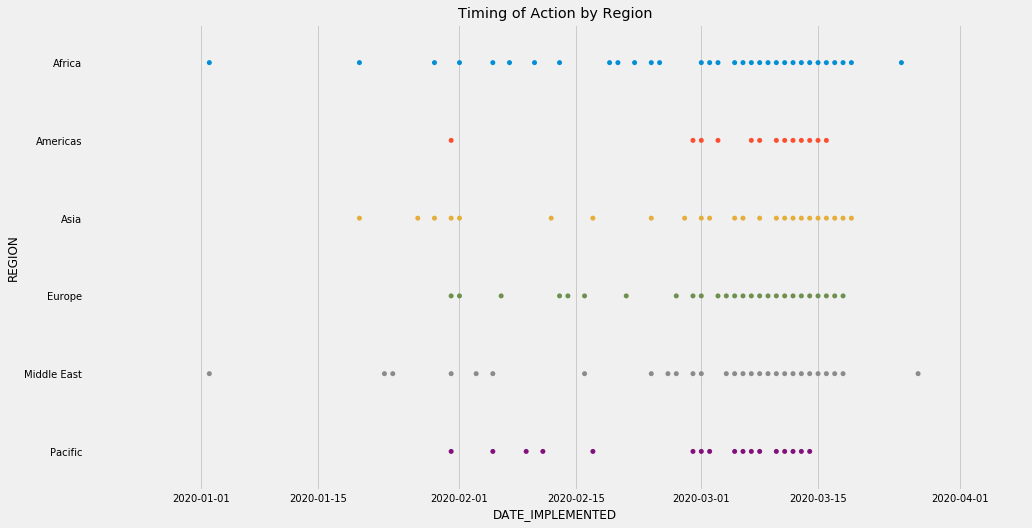

In [91]:
swarm_grouped( 'Timing of Action by Region', 'DATE_IMPLEMENTED', 'REGION', ['REGION', 'DATE_IMPLEMENTED'])

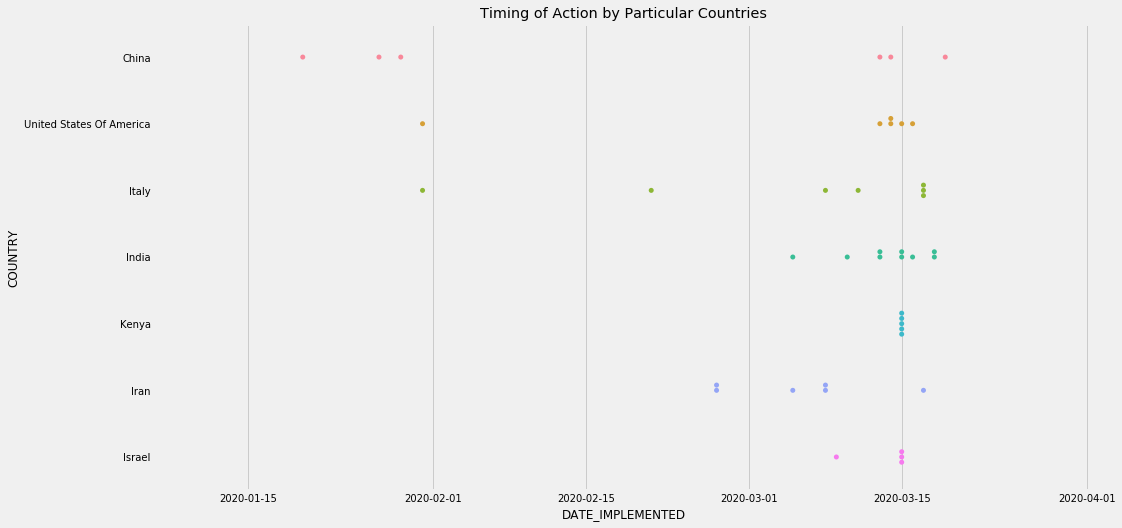

In [114]:
dtmp = df[ df.ISO.isin( hyperz + compz ) & dtmp.DATE_IMPLEMENTED.notna()]
swarm_grouped( 'Timing of Action by Particular Countries', 'DATE_IMPLEMENTED', 'COUNTRY', ['COUNTRY', 'DATE_IMPLEMENTED'], ddata=dtmp)